# Часть 1: Подготовка данных.

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import math
import seaborn as sns

In [4]:
train = pd.read_csv('X_train.csv')
y=pd.read_csv('y_train.csv')
test = pd.read_csv('X_test.csv')

In [5]:
dataframe = pd.concat([train, y['target']], axis=1)

In [6]:
y = dataframe['target']

In [7]:
y = pd.DataFrame(y)

In [8]:
train.isnull().sum()

credit_card_utilization           0
age                               0
overdue_30_59_days                0
debt_to_income                    0
monthly_income                20993
credits_loans                     0
overdue__more_than_90_days        0
mortgage_loans                    0
overdue_60_89_days                0
family_members                 2805
dtype: int64

 Как видно, в данных имеются пропуски. Было решено заменить их: месячный доход - средним значением, а кол-во членов семьи - нулём.

Могу объяснить своё решение: довольно большой процент пропусков в данных с месячным доходом занулять некорректно. Был также вариант с подстановкой значения моды, этот вариант также имеет место.
Что касается количества членов в семье, если этот пункт не был указан самим человеком, то вероятно что для человека это не имело значения. Можно предположить, что семьи у этого человека не было.

In [9]:
train['monthly_income'] = train['monthly_income'].fillna(train['monthly_income'].mean(), inplace = False)
train['family_members'] = train['family_members'].fillna(0, inplace = False)

In [10]:
X = train

In [11]:
>>> import numpy as np
>>> from sklearn.impute import SimpleImputer
>>> imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
SimpleImputer()

SimpleImputer()

In [12]:


X['credit_card_utilization'] = X['credit_card_utilization'].fillna(train.mean(), inplace = False)
X['age'] = X['age'].fillna(train.mean(), inplace = False)
X['overdue_30_59_days'] = X['overdue_30_59_days'].fillna(train.mean(), inplace = False)
X['debt_to_income'] = X['debt_to_income'].fillna(train.mean(), inplace = False)
X['monthly_income'] = X['monthly_income'].fillna(train.mean(), inplace = False)
X['credits_loans']=X['credits_loans'].fillna(train.mean(), inplace = False)
X['overdue__more_than_90_days'] = X['overdue__more_than_90_days'].fillna(train.mean(), inplace = False)
X['mortgage_loans'] = X['mortgage_loans'].fillna(train.mean(), inplace = False)
X['overdue_60_89_days'] = X['overdue_60_89_days'].fillna(train.mean(), inplace = False)
X['family_members'] = X['family_members'].fillna(train.mean(), inplace = False)

In [13]:
X.isnull().sum()

credit_card_utilization       0
age                           0
overdue_30_59_days            0
debt_to_income                0
monthly_income                0
credits_loans                 0
overdue__more_than_90_days    0
mortgage_loans                0
overdue_60_89_days            0
family_members                0
dtype: int64

In [14]:
train.isnull().sum()/train.shape[0]*100

credit_card_utilization       0.0
age                           0.0
overdue_30_59_days            0.0
debt_to_income                0.0
monthly_income                0.0
credits_loans                 0.0
overdue__more_than_90_days    0.0
mortgage_loans                0.0
overdue_60_89_days            0.0
family_members                0.0
dtype: float64

In [15]:
train.isnull().sum()

credit_card_utilization       0
age                           0
overdue_30_59_days            0
debt_to_income                0
monthly_income                0
credits_loans                 0
overdue__more_than_90_days    0
mortgage_loans                0
overdue_60_89_days            0
family_members                0
dtype: int64

In [16]:
X['credit_card_utilization'] = X['credit_card_utilization'].fillna(0).astype(np.float32)
X['age'] = X['age'].fillna(0).astype(np.float32)
X['overdue_30_59_days'] = X['overdue_30_59_days'].fillna(0).astype(np.int32)
X['debt_to_income'] = X['debt_to_income'].fillna(0).astype(np.float32)
X['monthly_income'] = X['monthly_income'].fillna(0).astype(np.float32)
X['credits_loans']=X['credits_loans'].fillna(0).astype(np.int32)
X['overdue__more_than_90_days'] = X['overdue__more_than_90_days'].fillna(0).astype(np.int32)
X['mortgage_loans'] = X['mortgage_loans'].fillna(0).astype(np.float32)
X['overdue_60_89_days'] = X['overdue_60_89_days'].fillna(0).astype(np.int32)
X['family_members'] = X['family_members'].fillna(0).astype(np.float32)

In [17]:
X = train

In [18]:
df = pd.concat([X['overdue_30_59_days'], X['overdue_60_89_days'], X['overdue__more_than_90_days'], X['monthly_income']], axis=1)
df

,overdue_30_59_days,overdue_60_89_days,overdue__more_than_90_days,monthly_income
0,0,0,0,6823.894531
1,1,0,0,356.580780
2,1,0,0,20349.896484
3,0,0,0,2894.368896
4,0,0,0,24833.228516
...,...,...,...,...
105104,0,0,0,9928.125000
105105,0,0,0,2187.355957
105106,1,0,0,3961.841064
105107,0,1,0,3705.546631


In [19]:
poly_features_df = df[['overdue_30_59_days', 'overdue_60_89_days', 'overdue__more_than_90_days', 'monthly_income']]
poly_features_test_df = df[['overdue_30_59_days', 'overdue_60_89_days', 'overdue__more_than_90_days', 'monthly_income']]
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

#poly_target = y['target']
#poly_features = poly_features.drop(columns = ['target'])

poly_features_df = imputer.fit_transform(poly_features_df)
poly_features_test_df = imputer.transform(poly_features_test_df)

from sklearn.preprocessing import PolynomialFeatures

# Создаем объект PolynomialFeatures, указав степень взаимодействия, равную 3
poly_transformer = PolynomialFeatures(degree = 3)

poly_transformer.fit(poly_features_df)
poly_features_df = poly_transformer.transform(poly_features_df)
poly_features_test_df = poly_transformer.transform(poly_features_test_df)
print('Polynomial Features shape: ', poly_features_df.shape)

Polynomial Features shape:  (105109, 35)


In [20]:
poly_features_df

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.17758310e+11],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.53391937e+07],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.42726427e+12],
       ...,
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.21857888e+10],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.08811418e+10],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.95440004e+11]])

In [21]:
poly_features_df = pd.DataFrame(poly_features_df, 
                             columns = poly_transformer.get_feature_names(['overdue_30_59_days', 'overdue_60_89_days', 
                                                                           'overdue__more_than_90_days', 'monthly_income']))

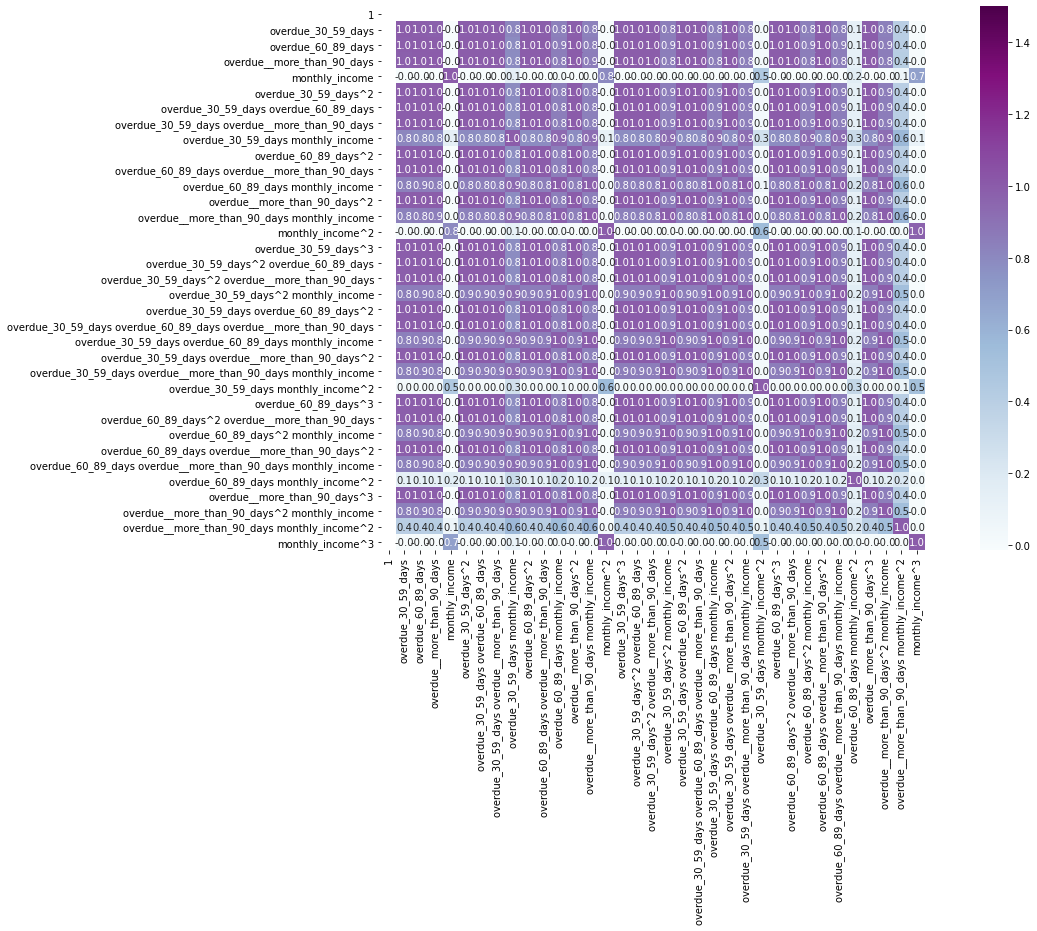

In [22]:
matrix = poly_features_df.corr() 
f, ax = plt.subplots(figsize=(20, 10)) 
sns.heatmap(matrix, vmax=1.5, square=True,annot=True, fmt=".1f",cmap="BuPu")
plt.show()

In [23]:
df_1 = pd.concat([poly_features_df['overdue_30_59_days monthly_income^2'], poly_features_df['overdue_60_89_days monthly_income^2'], poly_features_df['overdue__more_than_90_days monthly_income^2']], axis=1)

In [24]:
df_1 = pd.DataFrame(df_1)

In [25]:
Union = pd.concat([X, df_1], axis=1)

In [26]:
Union = Union.drop(columns = ['overdue_30_59_days', 'overdue_60_89_days'], axis=1)

In [27]:
Union

,credit_card_utilization,age,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,family_members,overdue_30_59_days monthly_income^2,overdue_60_89_days monthly_income^2,overdue__more_than_90_days monthly_income^2
0,0.000000,56.0,0.504328,6823.894531,9,0,1.0,5.0,0.000000e+00,0.000000e+00,0.0
1,0.170659,45.0,2.405859,356.580780,5,0,0.0,0.0,1.271499e+05,0.000000e+00,0.0
2,0.342176,75.0,0.445066,20349.896484,9,0,3.0,0.0,4.141183e+08,0.000000e+00,0.0
3,0.046219,50.0,0.814508,2894.368896,12,0,1.0,3.0,0.000000e+00,0.000000e+00,0.0
4,0.679556,58.0,0.390311,24833.228516,15,0,4.0,2.0,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
105104,0.017608,62.0,0.184589,9928.125000,6,0,2.0,0.0,0.000000e+00,0.000000e+00,0.0
105105,0.980631,25.0,0.158753,2187.355957,3,0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
105106,0.050256,73.0,0.849711,3961.841064,12,0,2.0,0.0,1.569618e+07,0.000000e+00,0.0
105107,0.447882,43.0,0.068033,3705.546631,4,0,0.0,0.0,0.000000e+00,1.373108e+07,0.0


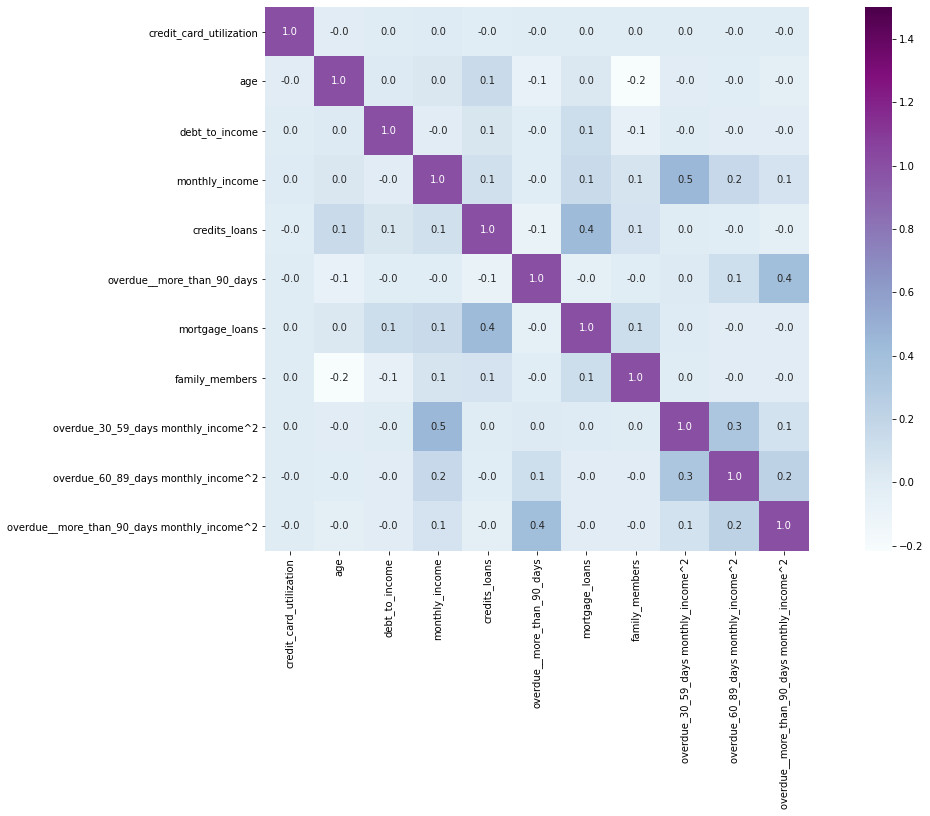

In [28]:
matrix = Union.corr() 
f, ax = plt.subplots(figsize=(20, 10)) 
sns.heatmap(matrix, vmax=1.5, square=True,annot=True, fmt=".1f",cmap="BuPu")
plt.show()

In [29]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=3)

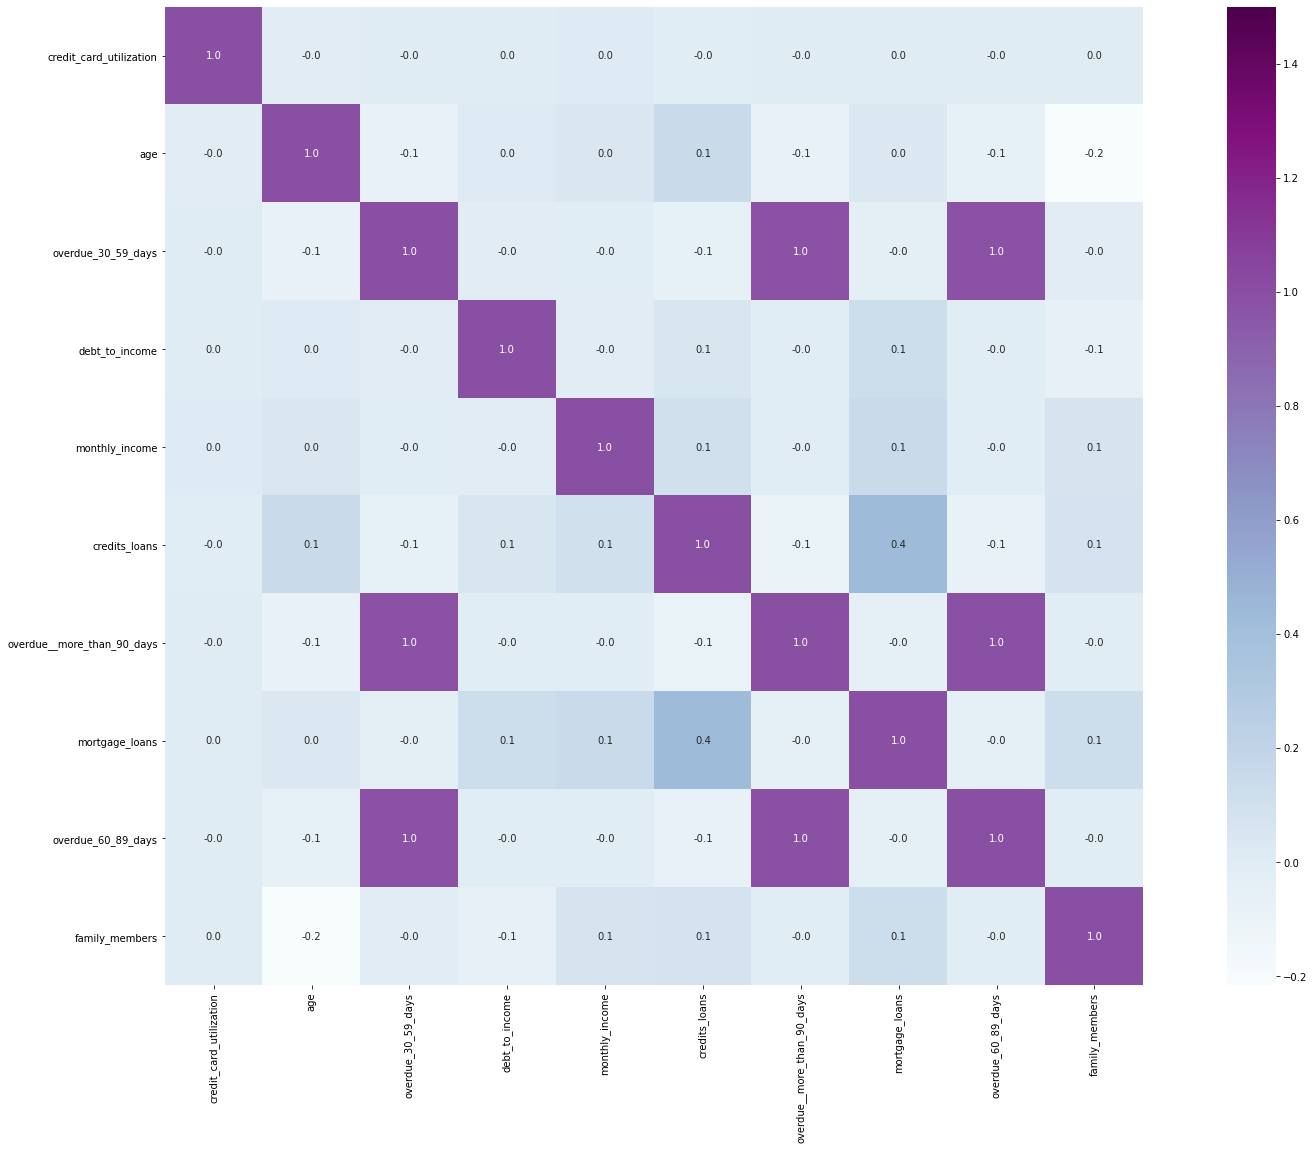

In [30]:
matrix = X.corr() 
f, ax = plt.subplots(figsize=(30, 18)) 
sns.heatmap(matrix, vmax=1.5, square=True,annot=True, fmt=".1f",cmap="BuPu")
plt.show()

In [31]:
X['credit_card_utilization'] = X['credit_card_utilization'].astype(np.float32)
X['age'] = X['age'].astype(np.float32)
#X['overdue_30_59_days'] = X['overdue_30_59_days'].astype(np.int32)
X['debt_to_income'] = X['debt_to_income'].astype(np.float32)
X['monthly_income'] = X['monthly_income'].astype(np.float32)
X['credits_loans']=X['credits_loans'].astype(np.int32)
#X['overdue__more_than_90_days'] = X['overdue__more_than_90_days'].astype(np.int32)
X['mortgage_loans'] = X['mortgage_loans'].astype(np.float32)
#X['overdue_60_89_days'] = X['overdue_60_89_days'].astype(np.int32)
X['family_members'] = X['family_members'].astype(np.float32)

In [32]:
X.isnull().sum()

credit_card_utilization       0
age                           0
overdue_30_59_days            0
debt_to_income                0
monthly_income                0
credits_loans                 0
overdue__more_than_90_days    0
mortgage_loans                0
overdue_60_89_days            0
family_members                0
dtype: int64

In [33]:
X = Union

In [34]:
X.isnull().sum()

credit_card_utilization                        0
age                                            0
debt_to_income                                 0
monthly_income                                 0
credits_loans                                  0
overdue__more_than_90_days                     0
mortgage_loans                                 0
family_members                                 0
overdue_30_59_days monthly_income^2            0
overdue_60_89_days monthly_income^2            0
overdue__more_than_90_days monthly_income^2    0
dtype: int64

In [35]:
X.dtypes

credit_card_utilization                        float32
age                                            float32
debt_to_income                                 float32
monthly_income                                 float32
credits_loans                                    int32
overdue__more_than_90_days                       int32
mortgage_loans                                 float32
family_members                                 float32
overdue_30_59_days monthly_income^2            float64
overdue_60_89_days monthly_income^2            float64
overdue__more_than_90_days monthly_income^2    float64
dtype: object

In [36]:
X['credit_card_utilization'] = X['credit_card_utilization'].fillna(0).astype(np.float32)
X['age'] = X['age'].fillna(0).astype(np.float32)
#X['overdue_30_59_days'] = X['overdue_30_59_days'].fillna(0).astype(np.int32)
X['debt_to_income'] = X['debt_to_income'].fillna(0).astype(np.float32)
X['monthly_income'] = X['monthly_income'].fillna(0).astype(np.float32)
X['credits_loans']=X['credits_loans'].fillna(0).astype(np.int32)
X['overdue__more_than_90_days'] = X['overdue__more_than_90_days'].fillna(0).astype(np.int32)
X['mortgage_loans'] = X['mortgage_loans'].fillna(0).astype(np.float32)
#X['overdue_60_89_days'] = X['overdue_60_89_days'].fillna(0).astype(np.int32)
X['family_members'] = X['family_members'].fillna(0).astype(np.float32)
X['overdue_30_59_days monthly_income^2'] = X['overdue_30_59_days monthly_income^2'].fillna(0).astype(np.float32)
X['overdue_60_89_days monthly_income^2'] = X['overdue_60_89_days monthly_income^2'].fillna(0).astype(np.float32)
X['overdue__more_than_90_days monthly_income^2'] = X['overdue__more_than_90_days monthly_income^2'].fillna(0).astype(np.float32)

# Часть 2. Теперь раздел с валидацией.

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [39]:
from sklearn.metrics import log_loss

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [42]:
from sklearn.linear_model import LogisticRegression

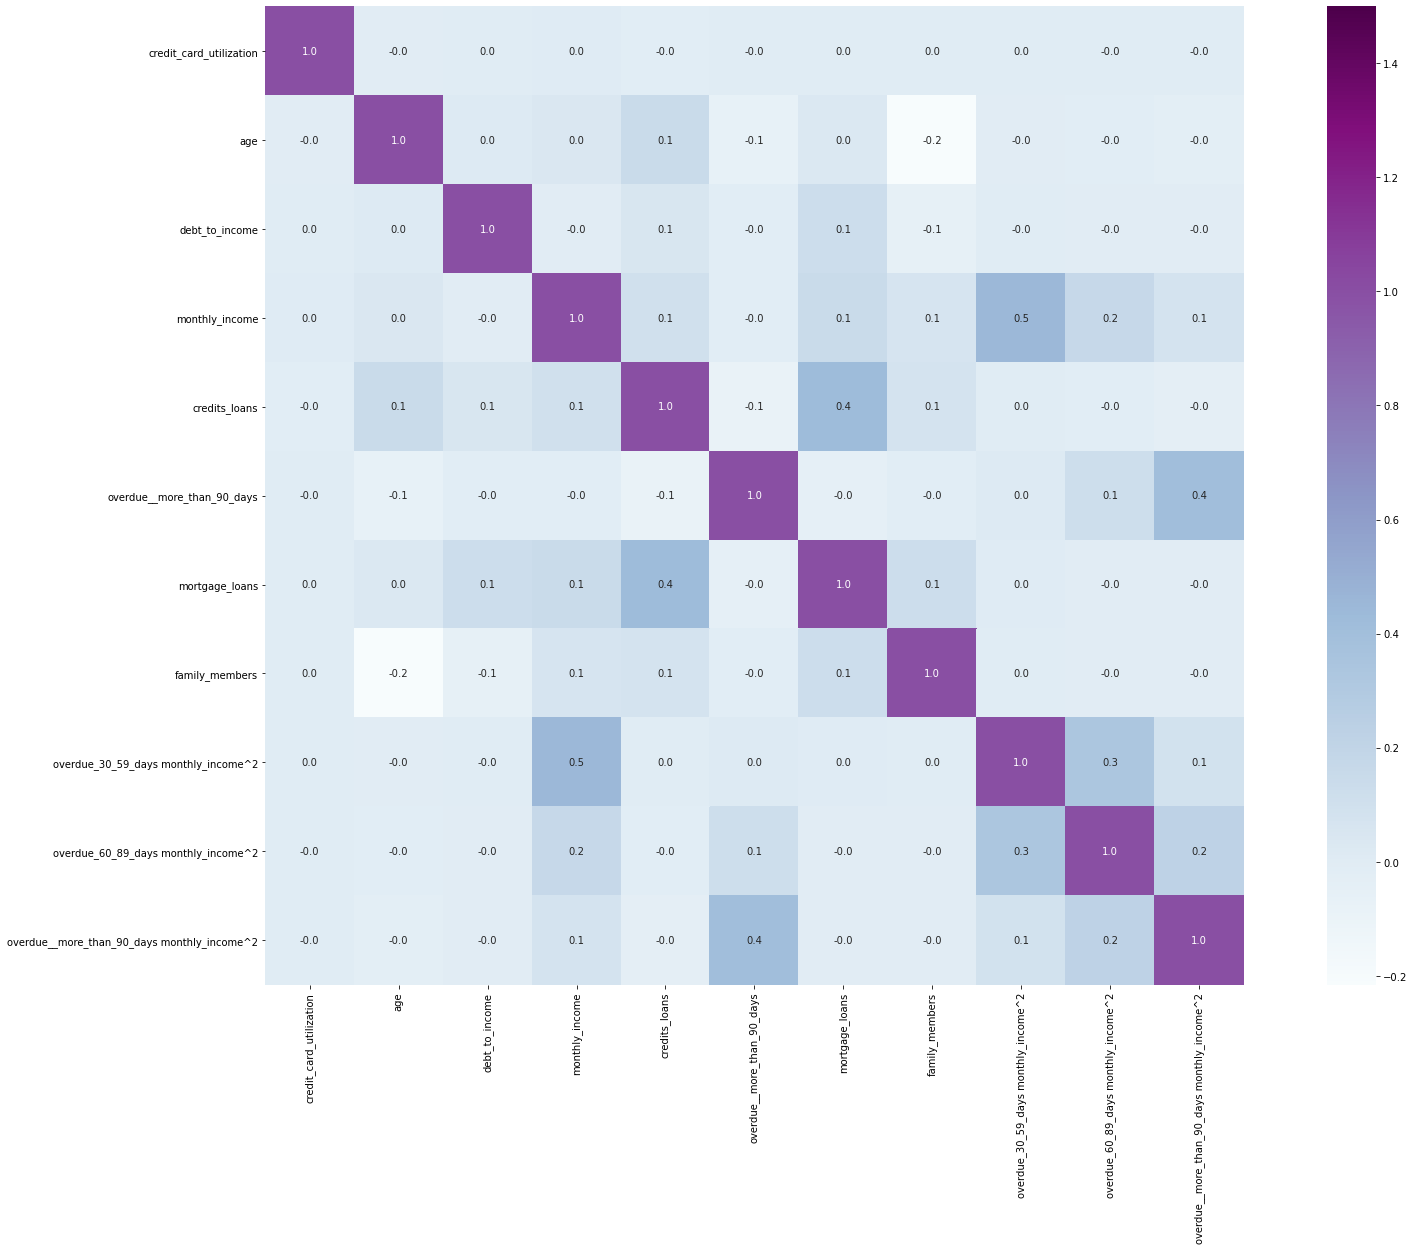

In [43]:
matrix = X.corr() 
f, ax = plt.subplots(figsize=(30, 18)) 
sns.heatmap(matrix, vmax=1.5, square=True,annot=True, fmt=".1f",cmap="BuPu")
plt.show()

# Подсчёт метрик: Precision, Recall, F1-score, Accuracy для разных моделей

In [44]:
from sklearn.metrics import classification_report

In [105]:
report = classification_report(y_train, kNN_model.predict(X_scaled), target_names=['Non-churned', 'Churned'])
print(report)

              precision    recall  f1-score   support

 Non-churned       0.93      1.00      0.97     73540
     Churned       0.62      0.03      0.05      5291

    accuracy                           0.93     78831
   macro avg       0.78      0.51      0.51     78831
weighted avg       0.91      0.93      0.90     78831



In [106]:
report2 = classification_report(y_train, LR_model.predict(X_scaled))#, target_names=['Non-churned', 'Churned'])
print(report2)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     73540
           1       0.00      0.00      0.00      5291

    accuracy                           0.93     78831
   macro avg       0.47      0.50      0.48     78831
weighted avg       0.87      0.93      0.90     78831



In [107]:
report3 = classification_report(y_train, DT_model.predict(X_scaled))#, target_names=['Non-churned', 'Churned'])
print(report3)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     73540
           1       0.71      0.31      0.44      5291

    accuracy                           0.95     78831
   macro avg       0.83      0.65      0.70     78831
weighted avg       0.94      0.95      0.94     78831



In [108]:
report4 = classification_report(y_train, RFC_model.predict(X_scaled), target_names=['Non-churned', 'Churned'])
print(report4)

              precision    recall  f1-score   support

 Non-churned       1.00      1.00      1.00     73540
     Churned       1.00      1.00      1.00      5291

    accuracy                           1.00     78831
   macro avg       1.00      1.00      1.00     78831
weighted avg       1.00      1.00      1.00     78831



In [ ]:
# для GBC

In [129]:
report6 = classification_report(y_train, GBC_model.predict(X_scaled))
print(report6)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     73540
           1       0.32      0.58      0.41      5291

    accuracy                           0.89     78831
   macro avg       0.64      0.75      0.68     78831
weighted avg       0.92      0.89      0.90     78831



In [119]:
import sklearn

In [ ]:
# метрики для RFC

In [132]:
precision = sklearn.metrics.precision_score(y_val, RFC_model.predict(X_val_scaled))

In [133]:
precision

0.5748175182481752

In [134]:
recall = sklearn.metrics.recall_score(y_val, RFC_model.predict(X_val_scaled))

In [135]:
recall

0.1810344827586207

In [141]:
f1 = sklearn.metrics.f1_score(y_val, RFC_model.predict(X_val_scaled))

In [142]:
f1

0.27534965034965037

In [ ]:
# all accuracies

In [143]:
import numpy
import sklearn.metrics

y_true = y_val
y_pred = RFC_model.predict(X_val_scaled)

r = sklearn.metrics.confusion_matrix(y_val, y_pred)
r = numpy.flip(r)

acc = (r[0][0] + r[-1][-1]) / numpy.sum(r)
print(acc)

0.9369053961488698


In [144]:
import numpy
import sklearn.metrics

y_true = y_val
y_pred = GBC_model.predict(X_val_scaled)

r = sklearn.metrics.confusion_matrix(y_val, y_pred)
r = numpy.flip(r)

acc = (r[0][0] + r[-1][-1]) / numpy.sum(r)
print(acc)

0.8921150772509323


In [145]:
import numpy
import sklearn.metrics

y_true = y_val
y_pred = kNN_model.predict(X_val_scaled)

r = sklearn.metrics.confusion_matrix(y_val, y_pred)
r = numpy.flip(r)

acc = (r[0][0] + r[-1][-1]) / numpy.sum(r)
print(acc)

0.934431844128168


In [1]:
# попытка поработать с коэффициентом Джини

In [216]:
def G(v):
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val

In [174]:
v = LR_model

In [220]:
v=[5,4,5]

In [175]:
G(v)

TypeError: float() argument must be a string or a number, not 'LogisticRegression'

In [222]:
bins, result, gini_val = G(v)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(bins, result, label="observed")
plt.plot(bins, bins, '--', label="perfect eq.")
plt.xlabel("fraction of population")
plt.ylabel("fraction of wealth")
plt.title("GINI: %.4f" %(gini_val))
plt.legend()
plt.subplot(2, 1, 2)
plt.hist(v, bins=20)

TypeError: only integer scalar arrays can be converted to a scalar index

In [237]:
plt.figure(figsize = (8,8))
Gini=[]


X_k = RFC_model.predict_proba(X_val)
X_k_1 = RFC_model.predict_proba(X_val).shift().fillna(0).values
Y_k = y_val['target'].values
Y_k_1 = y_val['target'].shift().fillna(0).values
Gini.append(1 - np.sum((X_k - X_k_1) * (Y_k + Y_k_1)))
plt.plot(np.insert(X_k,0,0), np.insert(X_val.values,0,0), label='0')
        
plt.title('Коэффициент Джини')
plt.xlabel('Кумулятивная доля населения')
plt.ylabel('Кумулятивная доля дохода')
plt.legend(loc="upper left")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'shift'

<Figure size 576x576 with 0 Axes>

# Метрики для pipe/ vc4 GBC - RFC

In [461]:
precision = sklearn.metrics.precision_score(y_val, pipe.predict(X_val_scaled))

In [462]:
precision

0.632183908045977

In [463]:
recall = sklearn.metrics.recall_score(y_val, pipe.predict(X_val_scaled))

In [464]:
recall

0.09482758620689655

In [465]:
f1 = sklearn.metrics.f1_score(y_val, pipe.predict(X_val_scaled))

In [466]:
f1

0.1649175412293853

In [467]:
import numpy
import sklearn.metrics

y_true = y_val
y_pred = pipe.predict(X_val_scaled)

r = sklearn.metrics.confusion_matrix(y_val, y_pred)
r = numpy.flip(r)

acc = (r[0][0] + r[-1][-1]) / numpy.sum(r)
print(acc)

0.9364106857447294


# Графики для метрик

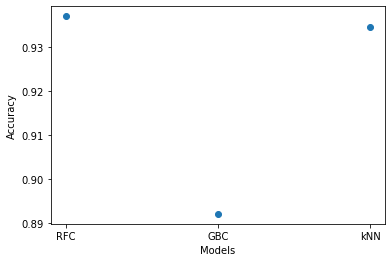

In [217]:
import matplotlib.pyplot as plt
plt.xlabel('Models')
plt.ylabel('Accuracy')
a = ['RFC', 'GBC', 'kNN']
b = [0.9369053961488698, 0.8921150772509323, 0.934431844128168]
plt.scatter(a, b)

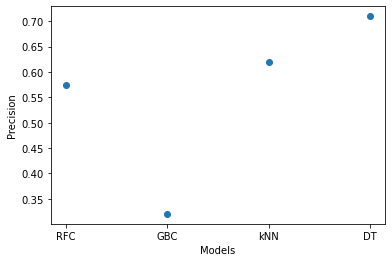

In [218]:
import matplotlib.pyplot as plt
plt.xlabel('Models')
plt.ylabel('Precision')
a = ['RFC', 'GBC', 'kNN', 'DT']
b = [0.5748175182481752, 0.58, 0.62, 0.71]
plt.scatter(a, b)

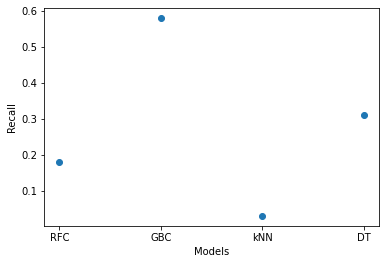

In [220]:
import matplotlib.pyplot as plt
plt.xlabel('Models')
plt.ylabel('Recall')
a = ['RFC', 'GBC', 'kNN', 'DT']
b = [0.1810344827586207, 0.58, 0.03, 0.31]
plt.scatter(a, b)

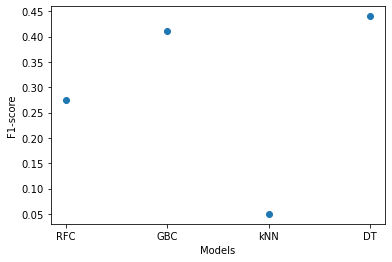

In [221]:
import matplotlib.pyplot as plt
plt.xlabel('Models')
plt.ylabel('F1-score')
a = ['RFC', 'GBC', 'kNN', 'DT']
b = [0.27534965034965037, 0.41, 0.05, 0.44]
plt.scatter(a, b)

In [52]:
#Нормировка данных

In [138]:
from sklearn.preprocessing import StandardScaler

In [46]:
ss = StandardScaler(with_mean=True, with_std=True)

X_scaled = ss.fit_transform(X_train)

X_val_scaled = ss.transform(X_val)

# Кросс-валидация: kNN

In [511]:
#Для подбора
model = KNeighborsClassifier()
params = {'n_neighbors': range(1, 100, 5)}#1,100,5,       1, 200, 10
cv = StratifiedKFold(shuffle=True, n_splits=10)
GS_kNN = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [512]:
GS_kNN.fit(X_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 100, 5)}, scoring='roc_auc')

In [513]:
GS_kNN.best_params_

{'n_neighbors': 96}

In [514]:
GS_kNN.best_score_

0.7227161332053843

In [515]:
# 191 - n neighbours

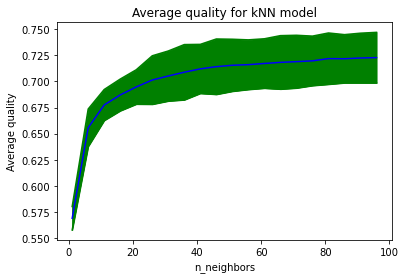

In [516]:
means = GS_kNN.cv_results_['mean_test_score']
stds = GS_kNN.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['n_neighbors'], means, color = 'blue')
plt.plot(params['n_neighbors'], means - error, color = 'green')
plt.plot(params['n_neighbors'], means + error, color = 'green')
plt.fill_between(params['n_neighbors'], means - error, means + error, color = 'green')
plt.xlabel('n_neighbors')
plt.ylabel('Average quality')
plt.title('Average quality for kNN model')
plt.show()

In [517]:
#Для подбора
model = KNeighborsClassifier()
params = {'n_neighbors': range(1, 100, 5)}#1,100,5,       1, 200, 10
cv = StratifiedKFold(shuffle=True, n_splits=5)
GS_kNN2 = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [518]:
GS_kNN2.fit(X_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 100, 5)}, scoring='roc_auc')

In [519]:
GS_kNN2.best_params_

{'n_neighbors': 96}

In [520]:
GS_kNN2.best_score_

0.7186492105018065

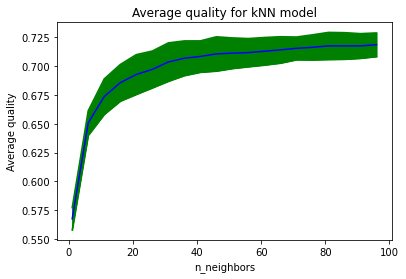

In [521]:
means = GS_kNN2.cv_results_['mean_test_score']
stds = GS_kNN2.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['n_neighbors'], means, color = 'blue')
plt.plot(params['n_neighbors'], means - error, color = 'green')
plt.plot(params['n_neighbors'], means + error, color = 'green')
plt.fill_between(params['n_neighbors'], means - error, means + error, color = 'green')
plt.xlabel('n_neighbors')
plt.ylabel('Average quality')
plt.title('Average quality for kNN model')
plt.show()

In [522]:
#Для подбора
model = KNeighborsClassifier()
params = {'n_neighbors': range(1, 100, 5)}#1,100,5,       1, 200, 10
cv = StratifiedKFold(shuffle=True, n_splits=20)
GS_kNN3 = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [523]:
GS_kNN3.fit(X_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 100, 5)}, scoring='roc_auc')

In [524]:
GS_kNN3.best_params_

{'n_neighbors': 96}

In [525]:
GS_kNN3.best_score_

0.7234647630924109

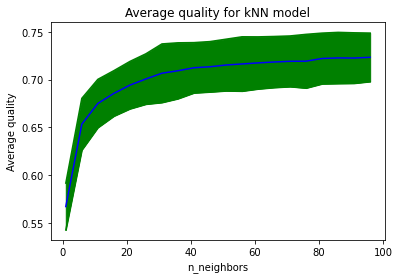

In [526]:
means = GS_kNN3.cv_results_['mean_test_score']
stds = GS_kNN3.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['n_neighbors'], means, color = 'blue')
plt.plot(params['n_neighbors'], means - error, color = 'green')
plt.plot(params['n_neighbors'], means + error, color = 'green')
plt.fill_between(params['n_neighbors'], means - error, means + error, color = 'green')
plt.xlabel('n_neighbors')
plt.ylabel('Average quality')
plt.title('Average quality for kNN model')
plt.show()

# Вывод: оптимальный k фолдов - 5.

Выбранная модель: Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Создаём модель леса из сотни деревьев
#model = RandomForestClassifier(n_estimators=181, 
                               #bootstrap = True,
                               #max_features = 'auto')
model = RandomForestClassifier()
params = {'n_estimators': range(1, 400, 20)}
cv = StratifiedKFold(shuffle=True, n_splits=10)
# Обучаем на тренировочных данных
model.fit(X_scaled, y_train)
GS_RFC = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')#341 - n estimators

In [48]:
GS_RFC.fit(X_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(1, 400, 20)}, scoring='roc_auc')

In [49]:
GS_RFC.best_params_

{'n_estimators': 361}

In [50]:
GS_RFC.best_estimator_

RandomForestClassifier(n_estimators=361)

In [51]:
GS_RFC.best_score_

0.8474047507887853

In [52]:
RFC_model = GS_RFC.best_estimator_

# Validation for RFC model

Kolmogorov-Smirnov test

In [39]:
from scipy.stats import kstest
import numpy as np

In [40]:
from scipy.stats import kstest
from scipy import stats
import numpy as np

x1 = y['target']
test_stat = kstest(x1, 'norm')

In [41]:
test_stat

KstestResult(statistic=0.5, pvalue=0.0)

In [42]:
x1 = X_val['credits_loans']
test_stat = kstest(x1, 'norm')
test_stat

KstestResult(statistic=0.9496221947129061, pvalue=0.0)

In [43]:
x1 = X_val['monthly_income']
test_stat = kstest(x1, 'norm')
test_stat

KstestResult(statistic=0.9847299227354944, pvalue=0.0)

In [44]:
x1 = X_val['credit_card_utilization']
test_stat = kstest(x1, 'norm')
test_stat

KstestResult(statistic=0.5, pvalue=0.0)

In [45]:
x1 = X_val['debt_to_income']
test_stat = kstest(x1, 'norm')
test_stat

KstestResult(statistic=0.5, pvalue=0.0)

Отвергаем гипотезу о нормальном распределении

(array([98078.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7031.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

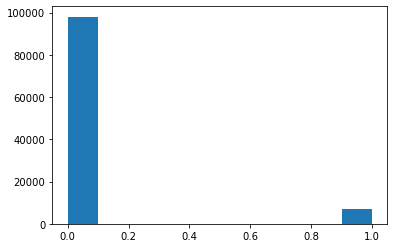

In [175]:
plt.hist(y['target'])

(array([30617.,  3683.,  1673.,  1039.,   695.,   459.,   369.,   198.,
           98.,    45.]),
 array([0.        , 0.09141274, 0.18282548, 0.27423823, 0.36565097,
        0.45706371, 0.54847645, 0.6398892 , 0.73130194, 0.82271468,
        0.91412742]),
 <BarContainer object of 10 artists>)

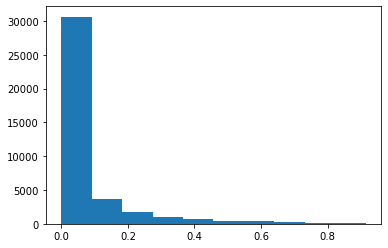

In [181]:
plt.hist(preds)

In [109]:
ks

KstestResult(statistic=0.9868041747138685, pvalue=0.0)

PSI (Индекс стабильности популяции)

In [49]:
def continuous2interval(df, df_target, percent_interval=0.1):
    special_target = []
    interval_target = []
    begin = False
    temp_percent = 0
    for index, row in (df[df_target].value_counts(normalize=True)).reset_index().sort_values(by='index').iterrows():
        if row[df_target] >= percent_interval:
            special_target.append(row['index'])
        else:
            temp_percent += row[df_target]
            if begin == False:
                begin = row['index']
            if temp_percent >= percent_interval:
                interval_target.append([begin, row['index']])
                begin = False
                temp_percent = 0
    if begin != False:
        interval_target.append([begin, np.inf])
    return interval_target, special_target

def PSI_factor_analysis(dev, val, column):
    intervals = [-np.inf] + [i[0] for i in continuous2interval(dev, column)[0]] + [np.inf]
    dev_temp = pd.cut(dev[column], intervals).value_counts(sort=False, normalize=True)
    val_temp = pd.cut(val[column], intervals).value_counts(sort=False, normalize=True)
    print('PSI:', sum(((dev_temp - val_temp)*np.log(dev_temp / val_temp)).replace([np.inf, -np.inf], 0)))
    plt.bar(np.arange(len(intervals)-1) - .15, dev_temp.values, width=0.3, label='Dev dataset')
    plt.bar(np.arange(len(intervals)-1) + .15, val_temp.values, width=0.3, label='Val dataset')
    plt.xticks(np.arange(len(intervals)-1), ['({}:{})'.format(i.left, i.right) for i in list(dev_temp.index)], rotation=90)
    plt.title('PSI for [{}]'.format(column))
    plt.legend()
    plt.show()

PSI: 0.0005716984878566656


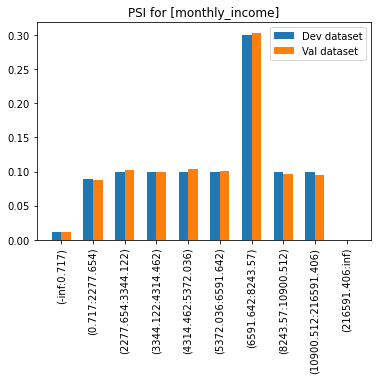

In [194]:
PSI_factor_analysis(X_train, X_val, 'monthly_income')

PSI: 0.0006114792787562661


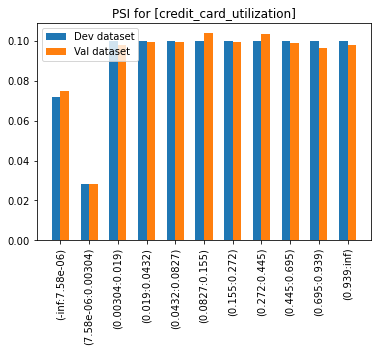

In [195]:
PSI_factor_analysis(X_train, X_val, 'credit_card_utilization')

PSI: 0.00023117599293944344


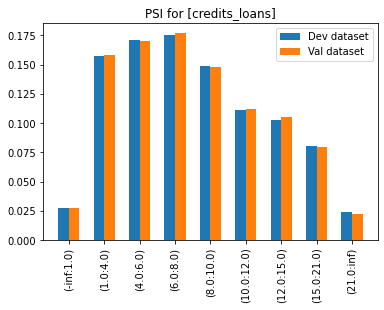

In [196]:
PSI_factor_analysis(X_train, X_val, 'credits_loans')

PSI: 0.000647761199789907


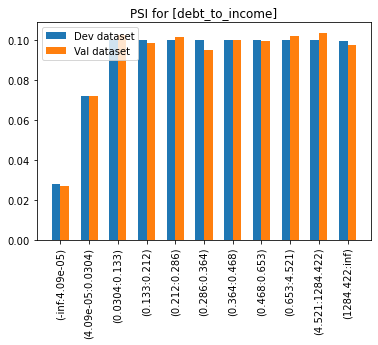

In [197]:
PSI_factor_analysis(X_train, X_val, 'debt_to_income')

PSI: 4.8632571698878645e-05


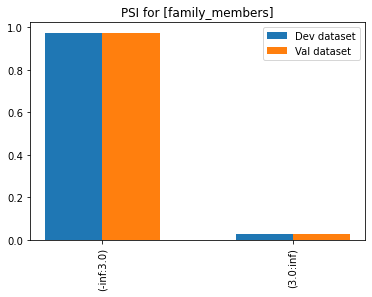

In [198]:
PSI_factor_analysis(X_train, X_val, 'family_members')

## Визуализация признаков

(array([98078.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7031.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

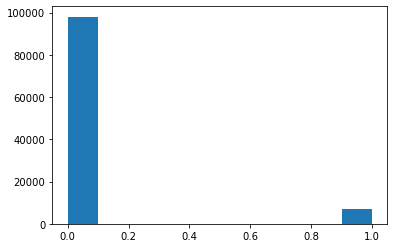

In [102]:
plt.hist(y['target'])

In [105]:
res = stats.shapiro(y)
res

ShapiroResult(statistic=0.26928699016571045, pvalue=0.0)

(array([1.05078e+05, 1.80000e+01, 2.00000e+00, 3.00000e+00, 3.00000e+00,
        3.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([      0.  ,  135952.55,  271905.1 ,  407857.66,  543810.2 ,
         679762.75,  815715.3 ,  951667.9 , 1087620.4 , 1223573.  ,
        1359525.5 ], dtype=float32),
 <BarContainer object of 10 artists>)

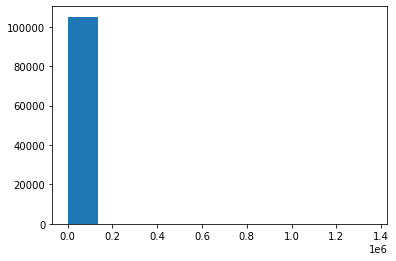

In [79]:
plt.hist(X['monthly_income'])

(array([2.8141e+04, 4.9781e+04, 2.0364e+04, 5.2900e+03, 1.0800e+03,
        3.3800e+02, 6.1000e+01, 3.1000e+01, 1.3000e+01, 1.0000e+01]),
 array([ 0. ,  5.8, 11.6, 17.4, 23.2, 29. , 34.8, 40.6, 46.4, 52.2, 58. ]),
 <BarContainer object of 10 artists>)

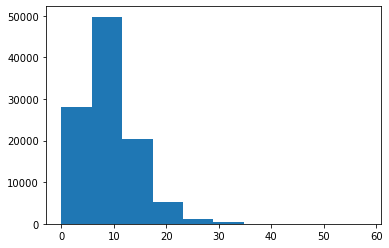

In [80]:
plt.hist(X['credits_loans'])

(array([1.05079e+05, 2.00000e+01, 4.00000e+00, 3.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.   ,  4877.973,  9755.946, 14633.919, 19511.893, 24389.865,
        29267.838, 34145.812, 39023.785, 43901.758, 48779.73 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

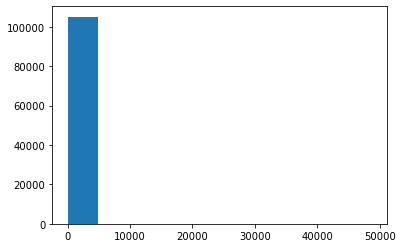

In [85]:
plt.hist(X['credit_card_utilization'])

(array([1.0000e+00, 1.6700e+02, 1.0235e+04, 2.0779e+04, 2.8112e+04,
        2.5640e+04, 1.3788e+04, 5.4630e+03, 9.1100e+02, 1.3000e+01]),
 array([  0. ,  11.1,  22.2,  33.3,  44.4,  55.5,  66.6,  77.7,  88.8,
         99.9, 111. ], dtype=float32),
 <BarContainer object of 10 artists>)

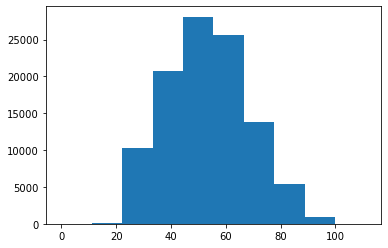

In [87]:
plt.hist(X['age'])

(array([1.05096e+05, 6.00000e+00, 2.00000e+00, 2.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([     0.   ,  32324.822,  64649.645,  96974.47 , 129299.29 ,
        161624.11 , 193948.94 , 226273.75 , 258598.58 , 290923.4  ,
        323248.22 ], dtype=float32),
 <BarContainer object of 10 artists>)

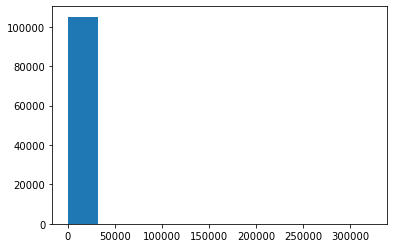

In [90]:
plt.hist(X['debt_to_income'])

(array([1.04902e+05, 1.30000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.94000e+02]),
 array([ 0. ,  9.8, 19.6, 29.4, 39.2, 49. , 58.8, 68.6, 78.4, 88.2, 98. ]),
 <BarContainer object of 10 artists>)

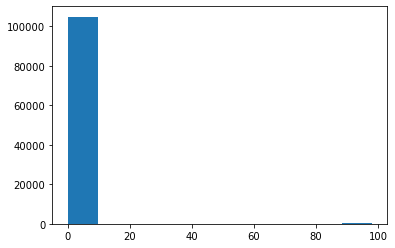

In [91]:
plt.hist(X['overdue__more_than_90_days'])

(array([1.04559e+05, 4.83000e+02, 5.00000e+01, 1.00000e+01, 4.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0. ,  5.4, 10.8, 16.2, 21.6, 27. , 32.4, 37.8, 43.2, 48.6, 54. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

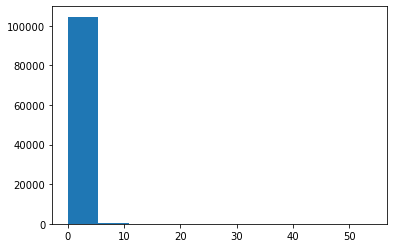

In [92]:
plt.hist(X['mortgage_loans'])

(array([8.2174e+04, 2.0203e+04, 2.5600e+03, 1.4400e+02, 2.1000e+01,
        5.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.],
       dtype=float32),
 <BarContainer object of 10 artists>)

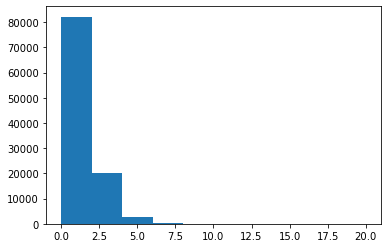

In [93]:
plt.hist(X['family_members'])

In [86]:
X

,credit_card_utilization,age,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,family_members,overdue_30_59_days monthly_income^2,overdue_60_89_days monthly_income^2,overdue__more_than_90_days monthly_income^2
0,0.000000,56.0,0.504328,6823.894531,9,0,1.0,5.0,0.000000e+00,0.0,0.0
1,0.170659,45.0,2.405859,356.580780,5,0,0.0,0.0,1.271499e+05,0.0,0.0
2,0.342176,75.0,0.445066,20349.896484,9,0,3.0,0.0,4.141183e+08,0.0,0.0
3,0.046219,50.0,0.814508,2894.368896,12,0,1.0,3.0,0.000000e+00,0.0,0.0
4,0.679556,58.0,0.390311,24833.228516,15,0,4.0,2.0,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
105104,0.017608,62.0,0.184589,9928.125000,6,0,2.0,0.0,0.000000e+00,0.0,0.0
105105,0.980631,25.0,0.158753,2187.355957,3,0,0.0,0.0,0.000000e+00,0.0,0.0
105106,0.050256,73.0,0.849711,3961.841064,12,0,2.0,0.0,1.569618e+07,0.0,0.0
105107,0.447882,43.0,0.068033,3705.546631,4,0,0.0,0.0,0.000000e+00,13731076.0,0.0


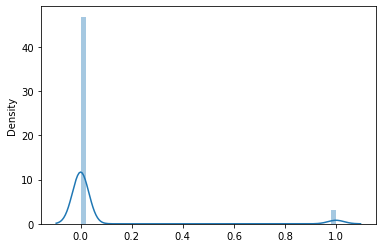

In [155]:
sns_plot = sns.distplot(y_val)
fig = sns_plot.get_figure()